In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def draw3D(X, Y, Z, angle=(45, -30)):
    """
    view_init(elev=None, azim=None): Set the elevation and azimuth of the axes.

    This can be used to rotate the axes programatically.
    ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
    if elev or azim are None (default), then the initial value is used which was specified in the Axes3D constructor.
    """
    fig = plt.figure(figsize=(15,7))
    ax = Axes3D(fig)
    ax.view_init(angle[0], angle[1])
    ax.plot_surface(X,Y,Z,rstride=1, cstride=1, cmap='rainbow')

In [3]:
class FC:
    """
    Full connection layer, foundation of CNN.
    """
    def __init__(self, in_num, out_num, lr = 0.01):
        """
        initialization for full connection layer
        """
        self._in_num = in_num
        self._out_num = out_num
        self.w = np.random.randn(out_num, in_num) * 10
        self.b = np.zeros(out_num)
    
    def _sigmoid(self, in_data):
        """
        apply sigmoid for in_data
        """
        return 1 / (1 + np.exp(-in_data))
    
    def forward(self, in_data):
        """
        forward propagation for in_data
        """
        return self._sigmoid(np.dot(self.w, in_data) + self.b)

In [4]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
X_f = X.flatten()
Y_f = Y.flatten()
# need to materilize in python 3, otherwise, used only once
data = list(zip(X_f, Y_f))

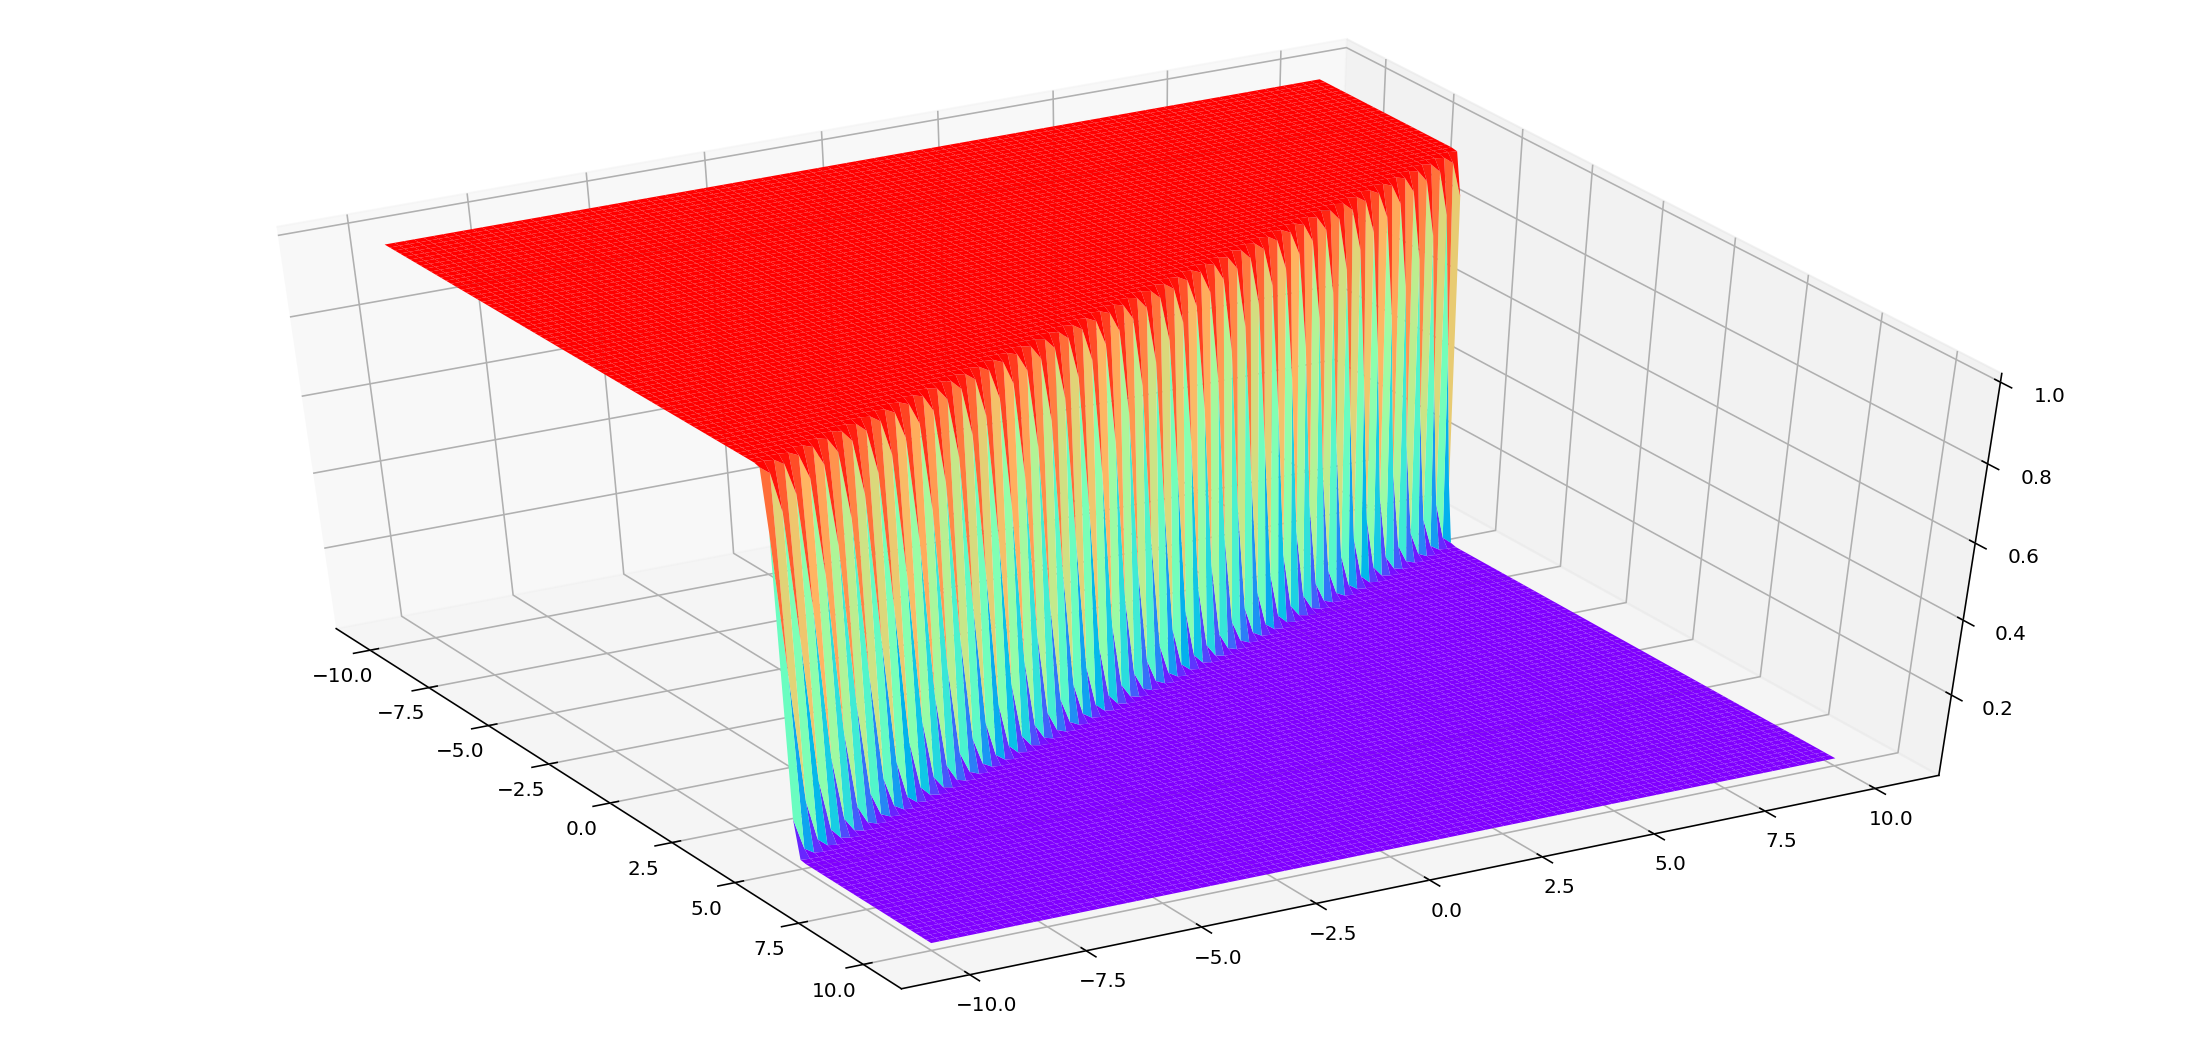

In [5]:
# 1 layer FC
fc = FC(2, 1)
Z1 = np.array([fc.forward(d) for d in data])
Z1 = Z1.reshape((100, 100))
draw3D(X, Y, Z1)

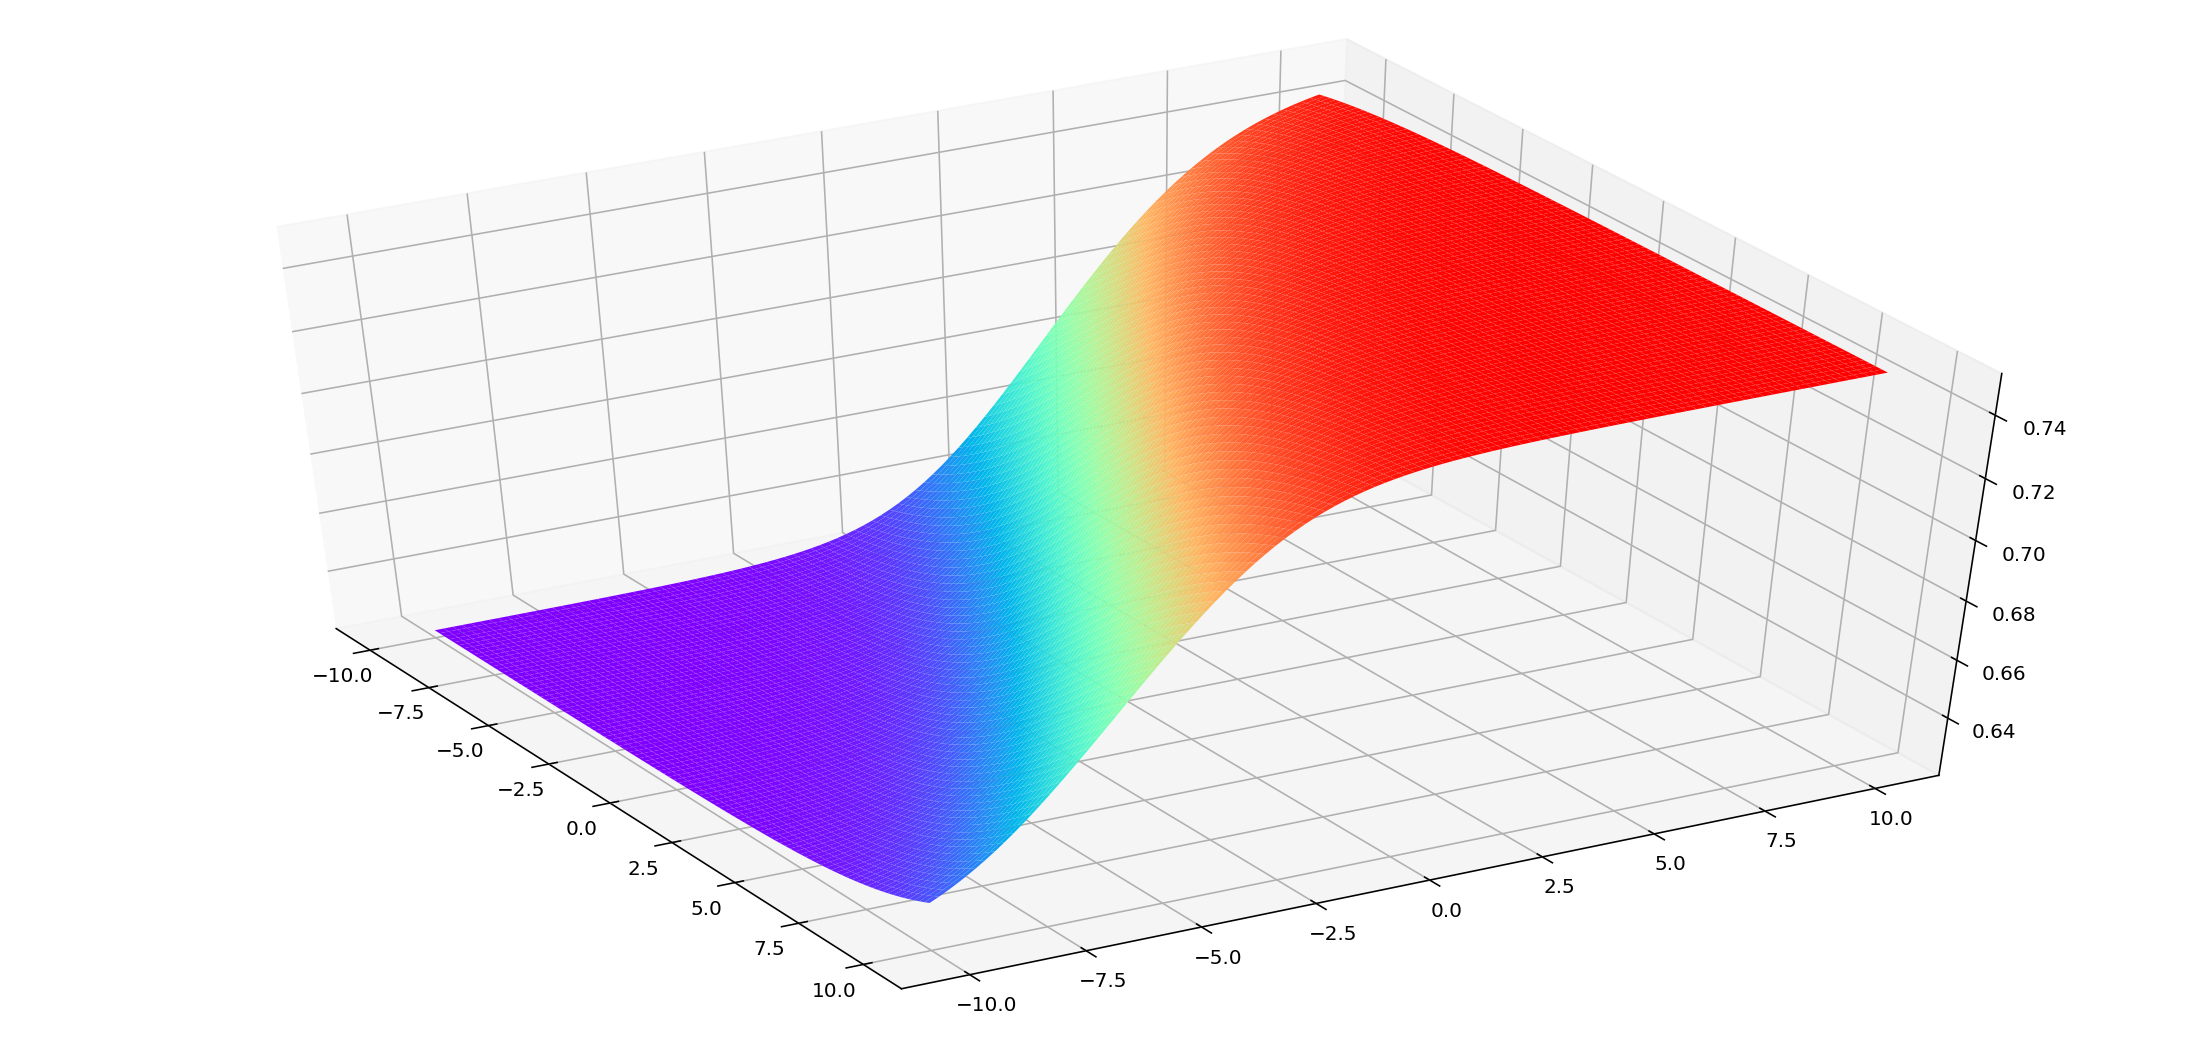

In [6]:
# 2 layer FC with only positive value
fc = FC(2, 3)
fc.w = np.array([[0.4, 0.6], [0.3, 0.7], [0.2, 0.8]])
fc.b = np.array([0.5, 0.5, 0.5])
fc2 = FC(3, 1)
fc2.w = np.array([0.3, 0.2, 0.1])
fc2.b = np.array([0.5])

Z1 = np.array([fc.forward(d) for d in data])
Z2 = np.array([fc2.forward(d) for d in Z1])
Z2 = Z2.reshape((100, 100))
draw3D(X, Y, Z2)